## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Loading Training and Testing Dataset and performing normalization

In [2]:
train_data = pd.read_csv('Train.csv')
num_words=4
train_data = train_data.drop(['Unnamed: 0'], axis=1)
train_data.Name = train_data.Name.str.split().str.slice(0,num_words).str.join(" ") #including only starting words of the column name which describe company and model
train_data = pd.get_dummies(train_data, columns=["Name",'Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
train_data = train_data.dropna()
train_data.Mileage = train_data.Mileage.str.replace(' kmpl','').astype("float64")
train_data.Engine = train_data.Engine.str.replace(' CC','').astype("float64")
train_data = train_data[train_data.Power != 'null bhp']
train_data.Power = train_data.Power.str.replace(' bhp','').astype("float64")
train_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi A3 35 TDI,Name_Audi A4 1.8 TFSI,Name_Audi A4 2.0 TDI,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2017,16500,23.84,1199.0,84.00,5.0,5.00,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,2017,47357,18.49,1493.0,100.00,7.0,8.37,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2014,35000,15.00,1598.0,103.52,5.0,4.50,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,2007,200000,17.20,1396.0,53.50,5.0,0.85,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2013,64000,21.02,1248.0,88.76,5.0,2.65,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [3]:
test_data = pd.read_csv('Test.csv')
test_data = test_data.drop(['Unnamed: 0'], axis=1)
test_data.Name = test_data.Name.str.split().str.slice(0,num_words).str.join(" ")
test_data = pd.get_dummies(test_data, columns=['Name','Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
test_data = test_data.dropna()
test_data.Mileage = test_data.Mileage.str.replace(' kmpl','').astype("float64")
test_data.Engine = test_data.Engine.str.replace(' CC','').astype("float64")
test_data = test_data[test_data.Power != 'null bhp']
test_data.Power = test_data.Power.str.replace(' bhp','').astype("float64")
test_data = test_data.reindex(columns=train_data.columns,fill_value=False)
test_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi A3 35 TDI,Name_Audi A4 1.8 TFSI,Name_Audi A4 2.0 TDI,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2013,84175,23.40,1248.0,74.00,5.0,6.95,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2012,62282,16.95,1197.0,78.90,5.0,2.90,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2017,37460,18.60,1197.0,81.86,5.0,6.28,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3,2011,106976,13.50,2400.0,215.00,5.0,13.80,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2013,60000,20.36,1197.0,78.90,5.0,2.75,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [4]:
train_num_col = train_data.select_dtypes(include=['int64','float64']).columns # Finding numerical data
train_num_col = train_num_col.drop('Price')
train_data[train_num_col] = (train_data[train_num_col] - train_data[train_num_col].mean()) / train_data[train_num_col].std()
test_data.head()
test_num_col = test_data.select_dtypes(include=['int64','float64']).columns
test_num_col = test_num_col.drop('Price')
test_data[test_num_col] = (test_data[test_num_col] - test_data[test_num_col].mean()) / test_data[test_num_col].std()
test_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi A3 35 TDI,Name_Audi A4 1.8 TFSI,Name_Audi A4 2.0 TDI,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-0.166278,0.118047,1.236734,-0.679771,-0.801440,-0.381061,6.95,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,-0.483790,0.001074,-0.287738,-0.767349,-0.704491,-0.381061,2.90,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1.103767,-0.131549,0.102244,-0.767349,-0.645925,-0.381061,6.28,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3,-0.801301,0.239872,-1.103152,1.298475,1.988335,-0.381061,13.80,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,-0.166278,-0.011118,0.518223,-0.767349,-0.704491,-0.381061,2.75,False,False,False,...,False,False,False,False,False,True,True,False,False,False


# Creating final numpy array for using them to train and test the model

In [5]:
X_train = train_data.drop('Price', axis=1).values.astype('float64') # Ensuring feature array is of float64 type
y_train = train_data['Price'].values.astype('float64') # Ensuring target array is of float64 type

X_test = test_data.drop('Price', axis=1).values.astype('float64')
y_test = test_data['Price'].values.astype('float64')

## Defining all functions

In [6]:
def calculate_r2(y_true, y_pred):
    r2 = 1 - (np.sum(np.square(y_true - y_pred)) / np.sum(np.square(y_true - np.mean(y_true))))
    return  r2

In [7]:
def update_accuracy(i,train_acc,y_true_train,y_pred_train,test_acc,weights,bias):
    global y_test,X_test
    
    y_pred_test=np.dot(X_test,weights)+bias
    train_acc[i]= calculate_r2(y_true_train,y_pred_train)
    test_acc[i]= calculate_r2(y_test,y_pred_test)
    
    return train_acc,test_acc

In [8]:
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    train_acc= np.zeros(iterations)
    test_acc= np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(weights) + bias 
        errors = predictions - y
        weight_gradient = (1 / m) * X.T.dot(errors)
        bias_gradient = (1 / m) * np.sum(errors)

        train_acc,test_acc=update_accuracy(i,train_acc,y,predictions,test_acc,weights,bias) #storing the accuracies
        
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

        pred = X.dot(weights) + bias 
        cost=(1 / (2 * m)) * np.sum((pred - y) ** 2)
        cost_history[i] = cost
        
        if i % 100 == 0:
            r2 = calculate_r2(y, predictions)
            print(f"Iteration {i}: Training R²: {r2:.4f}, Cost: {cost}, Testing accuracy: {test_acc[i]:.4f}")
    
    return weights, bias, cost_history, train_acc, test_acc


In [9]:
def predict(X, weights, bias):
    pred = X.dot(weights) + bias 
    pred = np.maximum(pred, 0)  
    return pred

## Training The Model

In [10]:
learning_rate = 0.1
iterations = 100000
weights = np.zeros(X_train.shape[1])  # Initialize weights
bias = 0.0 
st_time=time.time()
weights, bias, cost_history, train_acc, test_acc = gradient_descent(X_train, y_train,weights,bias, learning_rate, iterations)
en_time=time.time()
print("\nFinal cost:", cost_history[-1])
print("Final weights:", weights)
print("Final bias:", bias)

Iteration 0: Training R²: -0.7306, Cost: 84.12789859017121, Testing accuracy: -0.7771
Iteration 100: Training R²: 0.6955, Cost: 19.3364293334839, Testing accuracy: 0.6745
Iteration 200: Training R²: 0.7131, Cost: 18.22674952119618, Testing accuracy: 0.6899
Iteration 300: Training R²: 0.7219, Cost: 17.670520799128994, Testing accuracy: 0.6980
Iteration 400: Training R²: 0.7283, Cost: 17.264416511350543, Testing accuracy: 0.7042
Iteration 500: Training R²: 0.7338, Cost: 16.914711381941192, Testing accuracy: 0.7095
Iteration 600: Training R²: 0.7388, Cost: 16.595880530780452, Testing accuracy: 0.7142
Iteration 700: Training R²: 0.7435, Cost: 16.299433443941197, Testing accuracy: 0.7186
Iteration 800: Training R²: 0.7479, Cost: 16.021558630852443, Testing accuracy: 0.7227
Iteration 900: Training R²: 0.7520, Cost: 15.759916165836252, Testing accuracy: 0.7265
Iteration 1000: Training R²: 0.7559, Cost: 15.512752822311821, Testing accuracy: 0.7300
Iteration 1100: Training R²: 0.7596, Cost: 15.

# Printing the time taken to train the model

In [11]:
print(en_time-st_time,"sec")

227.3892776966095 sec


# Visualising how accuracy of both training and testing increasing with each epochs

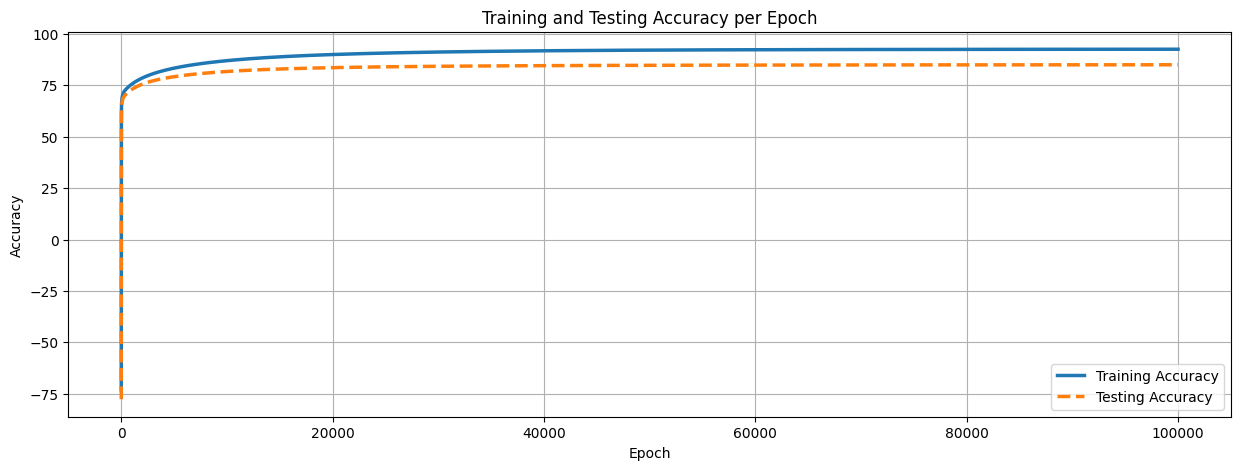

In [12]:
epochs=np.arange(iterations)
plt.figure(figsize=(15, 5))
plt.plot(epochs, train_acc*100, label='Training Accuracy',linewidth=2.5)
plt.plot(epochs, test_acc*100, label='Testing Accuracy', linestyle='--',linewidth=2.5)

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Visualizing Cost over each epochs

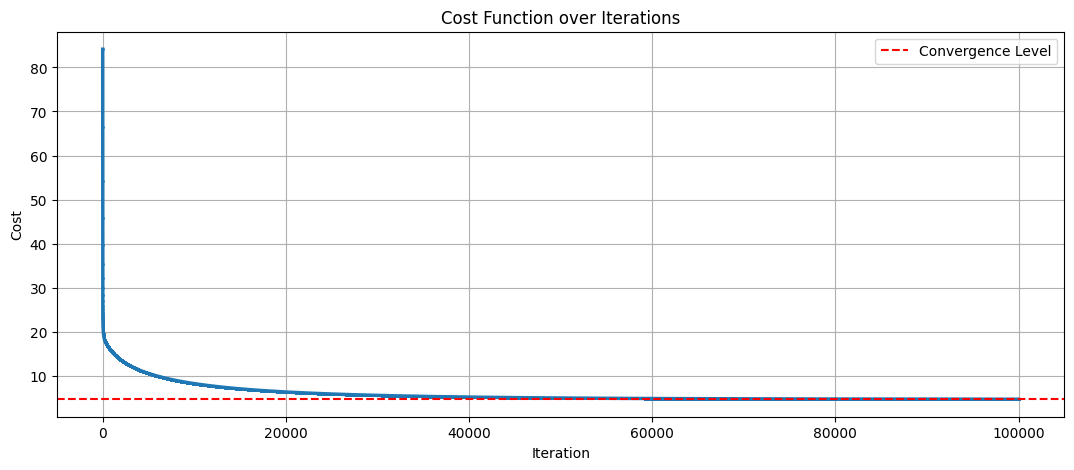

In [13]:
plt.figure(figsize=(13, 5))
plt.plot(np.arange(len(cost_history)), cost_history, linewidth=2.5, marker='o', markersize=1)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost per Iteration')
plt.grid(True)
plt.axhline(y=np.min(cost_history), color='red', linestyle='--', label='Convergence Level')
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

## Making Predictions Through The Model

In [14]:
pred = predict(X_test, weights, bias)

## Visualizing Actual Prices vs Predicted Prices

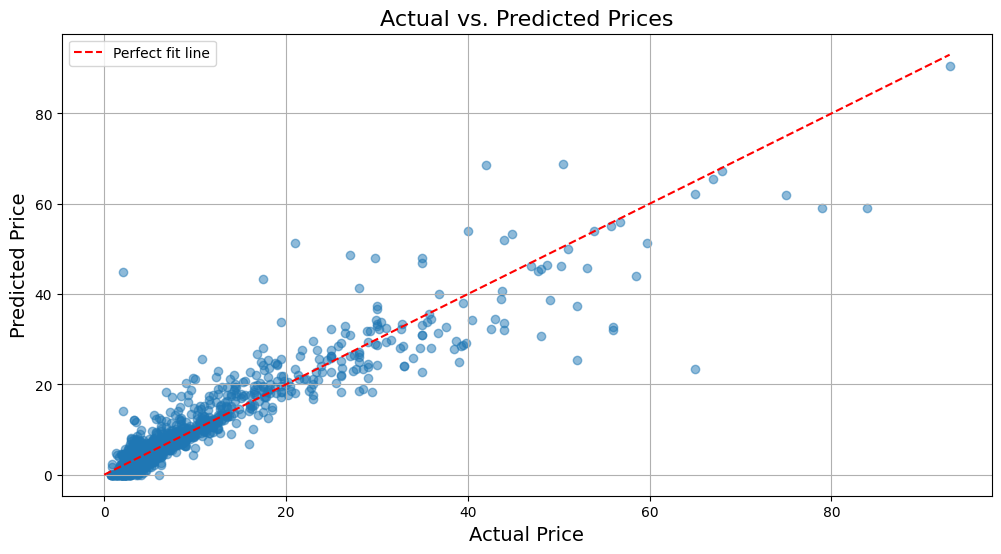

Final training R² Score: 92.58%
Final testing R² Score: 85.01%


In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, pred,alpha=0.5)
min_price = y_test.min()
max_price = y_test.max()
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--', label='Perfect fit line')

plt.title('Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

train_pred = X_train.dot(weights) + bias
test_pred = X_test.dot(weights) + bias

r2_train=calculate_r2(y_train,train_pred)
r2_test=calculate_r2(y_test,test_pred)

print(f"Final training R² Score: {r2_train * 100:.2f}%")
print(f"Final testing R² Score: {r2_test * 100:.2f}%")
